# Homework 1

For this homework, we are going to work with [Seoul Bike Sharing Demand dataset](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand) from UCI. Our aim in this homework is to predict Rented Bike count. The homework is due Sunday, October 29th midnight.

# Task 1

Download the dataset. 

Read the dataset using pandas.read_csv function.

Make data cleaning and preliminary analysis on dataframe (check the column/row counts, check if the data has missing values, fill the missing values with a method you choose, check the data type of columns, generate descriptive statistics for columns, generate graphs for some columns-you could use pyplot/seaborn etc, check if the data has any outlier values in any column and handle these values if it has).

You can generate your own inputs using the given features if you want (bonus point). 

You can also apply feature selection if you want (bonus point) - hint: correlation between input columns.

Encode categorical features.

Split your data into train and test sets.

# Task 2

Apply a linear regression model. 
First, try to construct your model without scaling your data. 
Then, construct another model with scaled inputs. 
Calculate performance evaluation metrics (RMSE, MSE, R-squared) for each model.

# Task 3

Apply another algorithm (tree-based algorithm) to your dataset. Calculate performance evaluation (RMSE, MSE, R-squared) for this model.

# Task 4

Explain the calculated evaluation metrics and compare your results for each model you trained in previous tasks.

Make some suggestions to improve model performance (they could be changings in data preparation step, using another regression algorithm etc.), explain them.

# Notes

1. You must document each step of your tasks: what are you doing, why are you doing it, what problems you encountered and how you solved it. All of these must be explained and documented. Solutions without sufficient documentations will be penalized accordingly. 50% of your points will come from your code, while the other 50% will come from your explanations.

2. You can use MS Excel to inspect the files, but loading them up to python using pandas and inspecting them there under jupyter is easier.

3. For both of Task 2 and Task 3, you must split your data into a train and test set, and then evaluate the performance of your model on the test set.

For further questions, please contact busesonugelen@gmail.com and sinanmustu.sm@gmail.com

## Solutions

#### Data Set Information:

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


#### Attribute Information:

Date : year-month-day
Rented Bike count - Count of bikes rented at each hour
Hour - Hour of he day
Temperature-Temperature in Celsius
Humidity - %
Windspeed - m/s
Visibility - 10m
Dew point temperature - Celsius
Solar radiation - MJ/m2
Rainfall - mm
Snowfall - cm
Seasons - Winter, Spring, Summer, Autumn
Holiday - Holiday/No holiday
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand#


In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.width", 100)
pd.set_option("expand_frame_repr", True)

In [18]:
data = pd.read_csv('SeoulBikeData.csv', encoding ='latin1')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### I want to see the values of columns for are there any absurd data input like Temperature being like 100 so i use describe function

In [5]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### There are no missing values 

In [7]:
data.isnull().sum()


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
data.sort_values(by='Rented Bike Count', ascending=False, inplace=False)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
4818,19/06/2018,3556,18,24.1,57,2.9,1301,15.0,0.56,0.0,0.0,Summer,No Holiday,Yes
4866,21/06/2018,3418,18,27.8,43,3.0,1933,14.0,1.35,0.0,0.0,Summer,No Holiday,Yes
4650,12/06/2018,3404,18,24.9,53,3.6,2000,14.6,1.28,0.0,0.0,Summer,No Holiday,Yes
4842,20/06/2018,3384,18,27.0,55,3.1,1246,17.1,1.26,0.0,0.0,Summer,No Holiday,Yes
4458,04/06/2018,3380,18,24.4,48,1.9,1998,12.6,0.56,0.0,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,11/04/2018,0,14,16.4,28,3.4,1804,-2.1,3.16,0.0,0.0,Spring,No Holiday,No
7376,04/10/2018,0,8,13.9,68,0.9,1912,8.0,0.34,0.0,0.0,Autumn,No Holiday,No
3157,11/04/2018,0,13,15.6,38,4.7,1558,1.3,3.32,0.0,0.0,Spring,No Holiday,No
7288,30/09/2018,0,16,21.2,28,3.2,2000,1.9,1.77,0.0,0.0,Autumn,No Holiday,No


In [9]:
data.sort_values(by='Holiday', ascending=False, inplace=False)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5747,28/07/2018,592,11,32.8,62,0.6,881,24.5,1.30,0.0,0.0,Summer,No Holiday,Yes
5761,29/07/2018,636,1,28.0,71,0.6,1799,22.2,0.00,0.0,0.0,Summer,No Holiday,Yes
5760,29/07/2018,921,0,28.4,70,0.9,1945,22.3,0.00,0.0,0.0,Summer,No Holiday,Yes
5759,28/07/2018,1039,23,28.6,74,0.7,1807,23.5,0.00,0.0,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,15/02/2018,170,11,0.1,22,2.0,2000,-19.1,1.84,0.0,0.0,Winter,Holiday,Yes
1836,15/02/2018,174,12,1.7,20,3.0,1983,-18.9,2.28,0.0,0.0,Winter,Holiday,Yes
1837,15/02/2018,240,13,2.2,18,3.4,1942,-19.7,2.30,0.0,0.0,Winter,Holiday,Yes
1838,15/02/2018,270,14,2.9,14,4.3,2000,-22.0,2.29,0.0,0.0,Winter,Holiday,Yes


In [20]:
correlation_matrix = data.corr()
correlation_matrix


/var/folders/0_/ylxckpnd5k959xnjlp9zsd5w0000gn/T/ipykernel_63427/3437211830.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


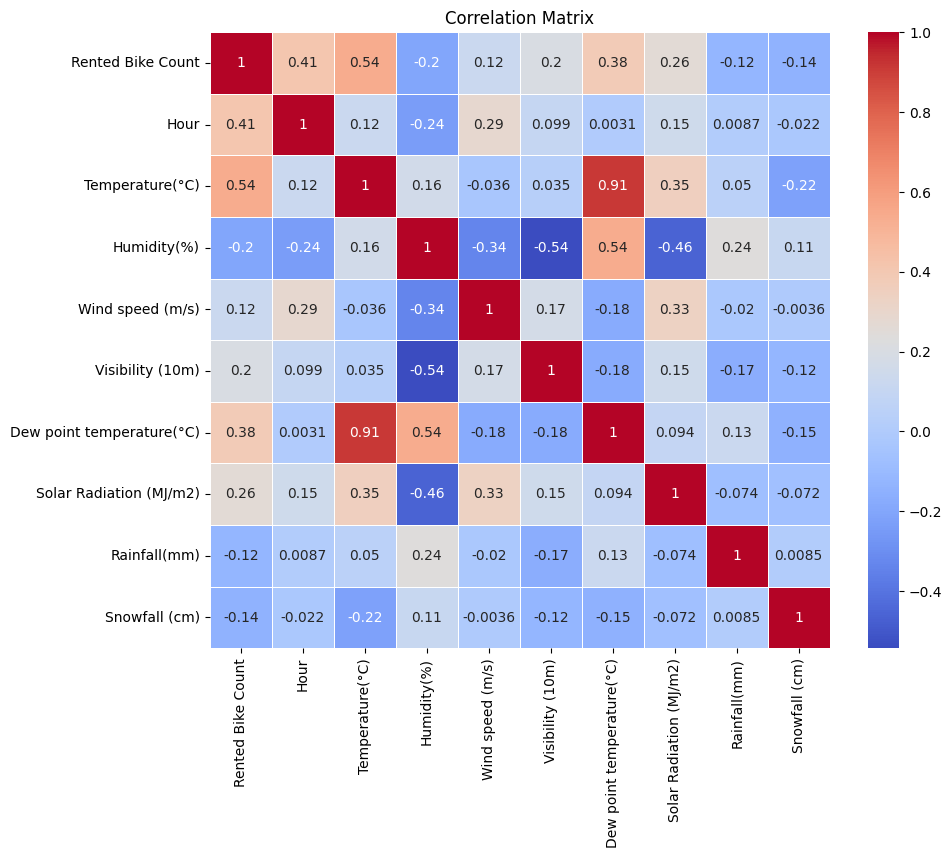

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## 
According to the correlation between columns i can say that Rented bike Count gets positive effected from Hour and Temperature since their correlation coefficient is way bigger compared to others in other words the higher temperatures the more people rents bike and the late time is more people go for renting bikes

In [10]:
hourly_stacked = data.groupby(['Hour', 'Holiday', 'Functioning Day', 'Seasons'])['Rented Bike Count'].sum().unstack(fill_value=0)
#### TAM DEĞİL
##
##
###
####
#####



In [11]:
tmp = pd.crosstab(data['Hour'],data['Seasons'])

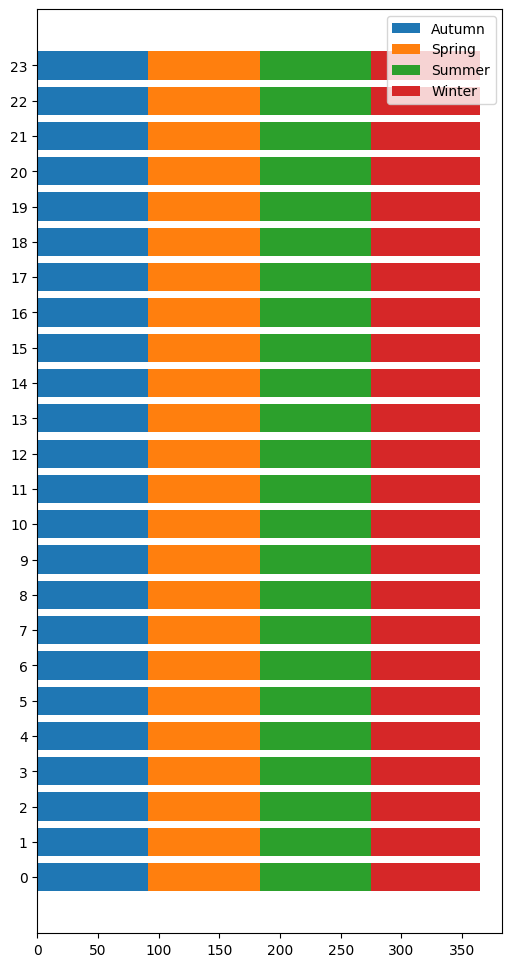

In [12]:
saat = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
sezon = np.unique(data['Seasons'])

fig, ax = plt.subplots(figsize = (6,12))

hs = np.zeros(len(saat))
for x in sezon:
    ax.barh(saat, tmp[x],left=hs)
    hs = hs + tmp[x]
    
ax.legend(sezon,loc='upper right') 

<Figure size 2400x1200 with 0 Axes>

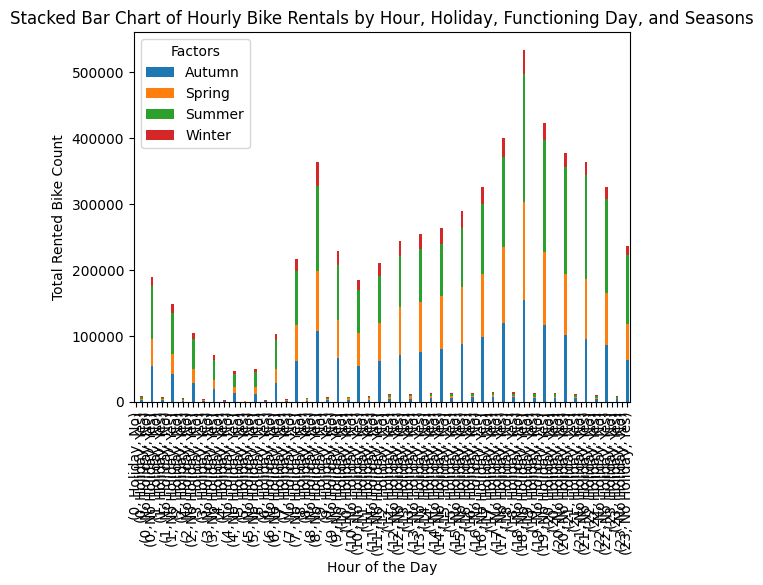

In [13]:
plt.figure(figsize=(24,12))
hourly_stacked.plot(kind='bar', stacked=True)

plt.xlabel('Hour of the Day')
plt.ylabel('Total Rented Bike Count')
plt.title('Stacked Bar Chart of Hourly Bike Rentals by Hour, Holiday, Functioning Day, and Seasons')
plt.legend(title='Factors')
plt.show()

In [14]:
hourly_data = data.groupby('Hour')['Rented Bike Count'].sum().reset_index()


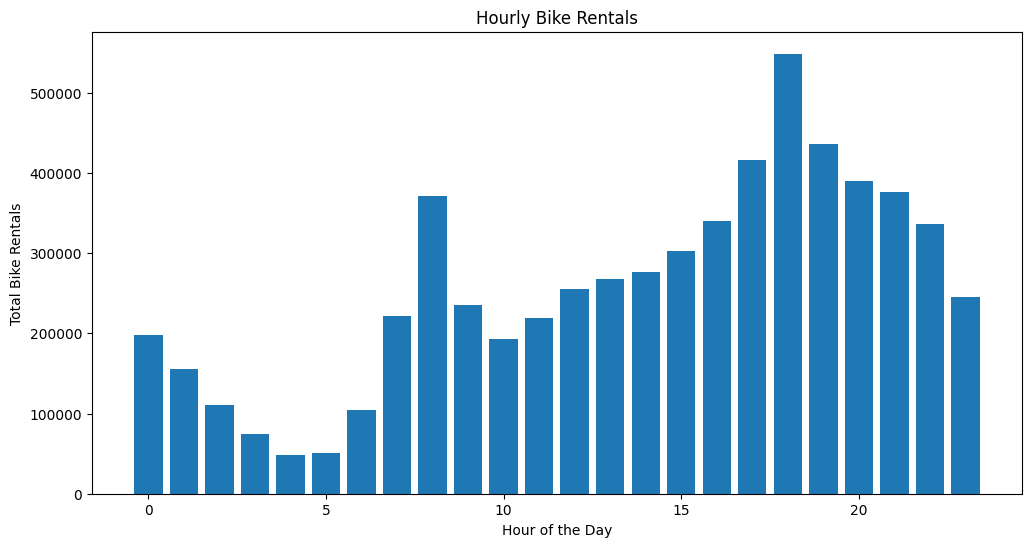

In [15]:
plt.figure(figsize=(12, 6))
plt.bar(hourly_data['Hour'], hourly_data['Rented Bike Count'])

plt.xlabel('Hour of the Day')
plt.ylabel('Total Bike Rentals')
plt.title('Hourly Bike Rentals')

plt.show()


## Task 2

## Task 3

## Task 4